# <center>Convolutional Neural Networks</center>

For this problem we have chosen the dataset: https://www.kaggle.com/slothkong/10-monkey-specie from Kaggle. This dataset aims at predicting 10 different monkey species based on 1368 images of JPG format.

In [1]:
import os
import sys
import glob

import numpy as np
import pandas as pd

from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

import keras
from keras.utils import Sequence
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import random as r

from matplotlib import image

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.layers import Dropout,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_absolute_error

from keras.layers import Dense, Dropout
import tensorflow as tf

Using TensorFlow backend.


### Read labels file

In [2]:
read_label_file = pd.read_csv (r'monkey_labels.txt')
read_label_file['Label'] = read_label_file['Label'].str.replace(' ', '') 
read_label_file#.iloc[0,0]

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


### Read images names and store in list

In [3]:
#from PIL import Image
image_list = []
im_name = []
data = [] 
labels = []
newsize = (150, 150)

for filename in glob.glob('images/*.jpg'): 
    im=Image.open(filename).convert('L')
    im1 = im.resize((newsize), Image.ANTIALIAS) 
    data.append(np.array(im1))
    fold, imag = filename.split('\\')
    im_nam, ext = imag.split('.jpg')
    labels.append(np.array(im_nam[1:2]))

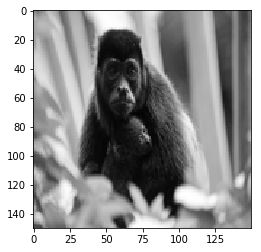

In [4]:
plt.imshow(data[0], cmap = 'gray')

### Assign labels to the data

In [5]:
Xs = np.array(data) #image_df['Image']
y = to_categorical(labels)

X_train, X_test, Y_train, Y_test = train_test_split(Xs, y, test_size=0.2, random_state=r.randint(1, 100))

In [6]:
print('Dimension of the trianing input is:', X_train.shape)
print('Dimension of the test input is:', X_test.shape)

print('Dimension of the trianing target is:', Y_train.shape)
print('Dimension of the test target is:', Y_test.shape)

Dimension of the trianing input is: (1094, 150, 150)
Dimension of the test input is: (274, 150, 150)
Dimension of the trianing target is: (1094, 10)
Dimension of the test target is: (274, 10)


In [7]:
X_train = X_train.reshape((1094,150,150,1))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((274,150,150,1))
X_test = X_test.astype('float32')/255

Y_train.shape

(1094, 10)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape = (150, 150, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=16,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4624)             

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=1/6,verbose=0)

In [12]:
test_loss,test_acc = model.evaluate(X_test,Y_test)

274/274 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 4ms/step


In [13]:
print(f'Test Loss: {test_loss}, test Accuracy: {test_acc}')

Test Loss: 6.773038338570699, test Accuracy: 0.41605839133262634


## 1. Plot the loss and accuracy curves for training and validation sets.

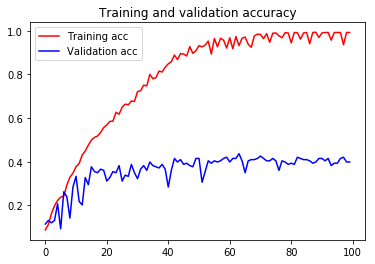

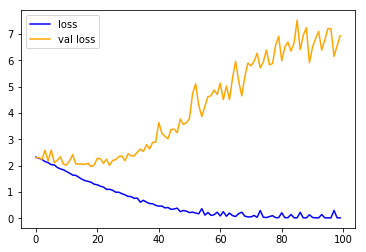

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs,history.history['loss'],label='loss', color='blue')
plt.plot(epochs, history.history['val_loss'],label='val loss',color='orange')
plt.legend()
plt.show()

## 2. Explain if you observe any overfitting and why.

The training error is extrmely lower than the validation/test error. Hence there is overfitting.

## 3. Report the model accuracy on the test set. Include the confusion matrix

Model Accuracy on the test set is: 41.61%

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

categorical_test_labels = pd.DataFrame(Y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)
confusion_matrix

array([[14,  0,  1,  0,  0,  2,  0,  0,  3,  9],
       [ 1,  7,  2,  5,  0,  2,  2,  1,  1,  2],
       [ 2,  0, 18,  4,  1,  0,  2,  0,  0,  2],
       [ 0,  2,  0,  9,  1,  3,  3,  1,  1,  1],
       [ 0,  1,  1,  2,  8,  1,  4,  0,  0,  2],
       [ 2,  1,  6,  2,  0,  9,  3,  0,  0,  6],
       [ 0,  2,  2,  5,  1,  4, 10,  0,  2,  0],
       [ 1,  5,  2,  8,  5,  3,  3, 10,  2,  1],
       [ 2,  3,  1,  0,  5,  1,  2,  2, 10,  3],
       [ 2,  1,  3,  1,  1,  0,  0,  1,  1, 19]], dtype=int64)